In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# 1. (методичка стр. 67)

In [24]:
A = 2.
f1 = 50
f2 = 150
f3 = 450
T1 = 1/f1
T2 = 1/f2
T3 = 1/f3
N = 10_000
omega1 = 2 * np.pi * f1
omega2 = 2 * np.pi * f2
omega3 = 2 * np.pi * f3
t = np.linspace(-0.1, 0.1, N)
x_cos = A * np.cos(omega1 * t) + A * np.cos(omega2 * t) + A * np.cos(omega3 * t)

# 2.

In [35]:
def butterworth_filter(freqs, cutoff, fc=2000, order=2):
    wc = 2 * np.pi * cutoff
    H = wc**2 / (-freqs**2 + 1j * np.sqrt(2) * wc * freqs + 1)
    return H

In [36]:
def butterworth_lowpass_filter(frequencies, cutoff, order=2):
    wc = 2 * np.pi * cutoff  # Частота среза в радианах
    H = wc**2 / ((-frequencies**2) + 1j*np.sqrt(2)*wc*frequencies + wc**2)
    return H

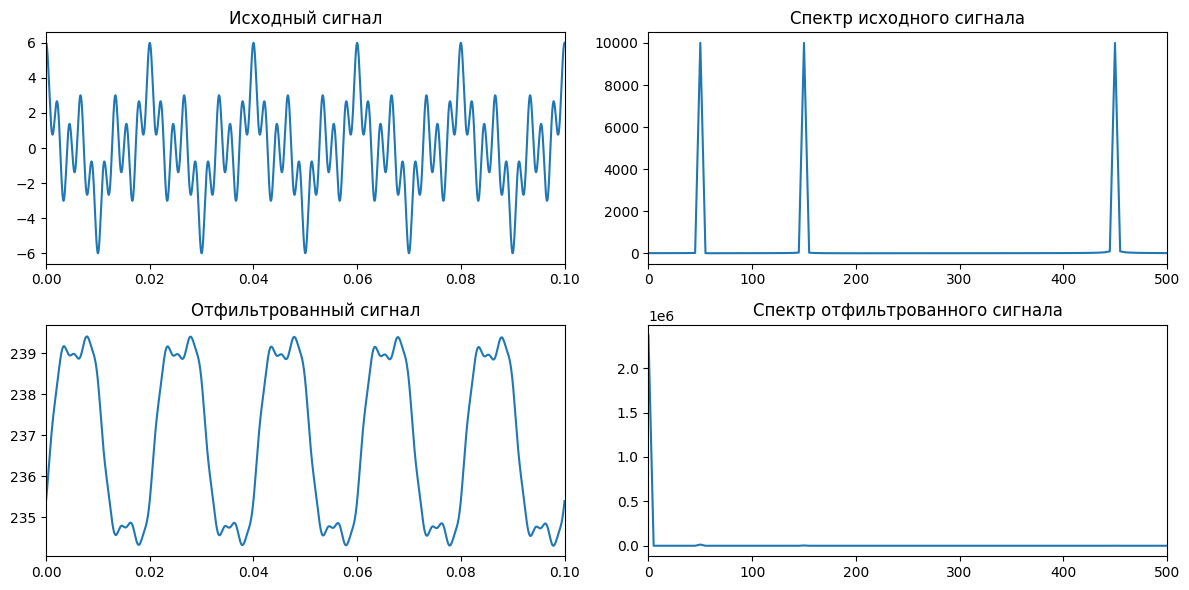

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Параметры сигнала
fs = 10_000  # Частота дискретизации

# БПФ (FFT) для исходного сигнала
signal_fft = fft(x_cos)
frequencies = fftfreq(t.size, d=t[1]-t[0])

# Применение фильтра Баттерворта
cutoff_freq = 100  # Частота среза
H = butterworth_filter(2 * np.pi * frequencies, cutoff_freq)
filtered_signal_fft = signal_fft * H

# Обратное преобразование Фурье для получения отфильтрованного сигнала
filtered_signal = np.real(ifft(filtered_signal_fft))
filtered_signal_fft = fft(filtered_signal)

# Графики
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, x_cos)
plt.xlim(0, .1)
plt.title("Исходный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

# Отфильтрованный сигнал
plt.subplot(2, 2, 3)
plt.plot(t, filtered_signal)
plt.xlim(0, .1)
plt.title("Отфильтрованный сигнал")

# Спектр исходного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtered_signal_fft[:fs//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.tight_layout()
plt.show()
